### Consumer Electronics Sales Forecasting

##### *Focus: Sales forecasting for Fast Moving Consumer Electronics to Optimize Inventory and Maximize Profitability*

### *Import Libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

#### *Load Dataset*

In [2]:
df = pd. read_csv(r'C:\Users\ASUS PC\Desktop\AMDARI INTERNSHIP\Amdari\ElectroTech-Sales-Forecast\ElectroTech Forecasting Data.csv')

In [3]:
#Understand the structure of the data
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Rows: 136193, Columns: 11


In [4]:
#quick overview of dataset
print(df.head(5))

   Product_ID    Category   Price        Date  Season  Market_Trend_Index  \
0        1103      Laptop  105.32  2009-01-01  Winter           -1.859160   
1        1436      Tablet  145.55  2009-01-01  Winter           -0.345587   
2        1271  Smartphone   97.82  2009-01-01  Winter           -0.384738   
3        1107      Laptop   64.00  2009-01-01  Winter            0.716763   
4        1072      Tablet   67.83  2009-01-01  Winter           -0.242074   

   Competitor_Activity_Score  Consumer_Confidence_Index  \
0                   0.546694                  84.680465   
1                   0.940428                  42.919288   
2                   0.751155                  55.191268   
3                   0.125939                  88.746454   
4                  -0.412932                  67.947536   

  Product_Specification_1 Product_Specification_2  Sales_Volume  
0                  Spec_C       Long-Battery-Life            49  
1                  Spec_C             Lightweight 

#### *Column description of the dataset*

- Product_ID: This is the ID that distinguishes the products from each other. It contains integer values.
- Category: This is the product category. It contains ['Laptop', 'Tablet', 'Smartphone', 'Accessories'].
- Price: This is the price of the product in US dollars ($).
- Date: The date of the sale of that product.
- Season: The season of the year the product was sold.
- Market_Trend_Index: This represents the extrenal factors affecting the electronics industry.
- Competitor_Activity_Score: This is a measure of the comapny's competitor influence in the market.
- Consumer_Confidence_Index:This is a measure of the consumer's confidence level at a particular date. 
- Product_Specification: Specific information on the products themselves.


In [5]:
#Summary of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136193 entries, 0 to 136192
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Product_ID                 136193 non-null  int64  
 1   Category                   136193 non-null  object 
 2   Price                      136193 non-null  float64
 3   Date                       136193 non-null  object 
 4   Season                     136193 non-null  object 
 5   Market_Trend_Index         136193 non-null  float64
 6   Competitor_Activity_Score  136193 non-null  float64
 7   Consumer_Confidence_Index  136193 non-null  float64
 8   Product_Specification_1    136193 non-null  object 
 9   Product_Specification_2    136193 non-null  object 
 10  Sales_Volume               136193 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 11.4+ MB
None


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.dtypes

Product_ID                            int64
Category                             object
Price                               float64
Date                         datetime64[ns]
Season                               object
Market_Trend_Index                  float64
Competitor_Activity_Score           float64
Consumer_Confidence_Index           float64
Product_Specification_1              object
Product_Specification_2              object
Sales_Volume                          int64
dtype: object

In [8]:
df['Category'].unique()

array(['Laptop', 'Tablet', 'Smartphone', 'Accessories'], dtype=object)

In [9]:
#handle missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values>0].sort_values(ascending=False)
print(missing_values)

Series([], dtype: int64)


In [10]:
#quick stats of dataset
print(df.describe(exclude='object'))

          Product_ID          Price                           Date  \
count  136193.000000  136193.000000                         136193   
mean     1347.703384     106.812513  2014-12-22 05:17:20.062264320   
min      1001.000000      40.510000            2009-01-01 00:00:00   
25%      1174.000000      75.560000            2011-12-29 00:00:00   
50%      1348.000000     104.710000            2014-12-19 00:00:00   
75%      1522.000000     138.310000            2017-11-27 00:00:00   
max      1694.000000     181.800000            2020-12-30 00:00:00   
std       200.341518      36.419229                            NaN   

       Market_Trend_Index  Competitor_Activity_Score  \
count       136193.000000              136193.000000   
mean            -0.000277                  -0.000656   
min             -4.067055                  -4.181590   
25%             -0.683015                  -0.676466   
50%              0.001093                   0.000555   
75%              0.680506        

In [11]:
#check for duplicated values
print(df.duplicated().any())

False


#### *Check data distribution in numeric columns to account for outliers and deal with the outliers*

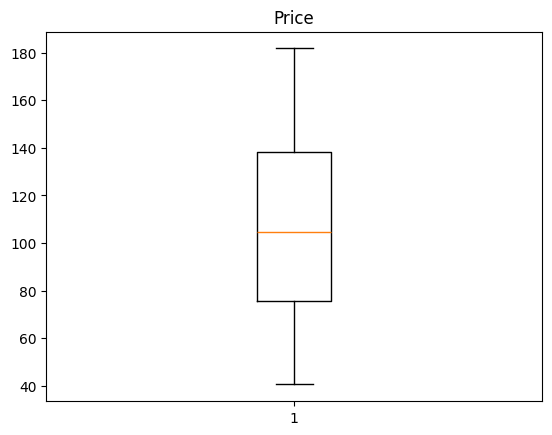

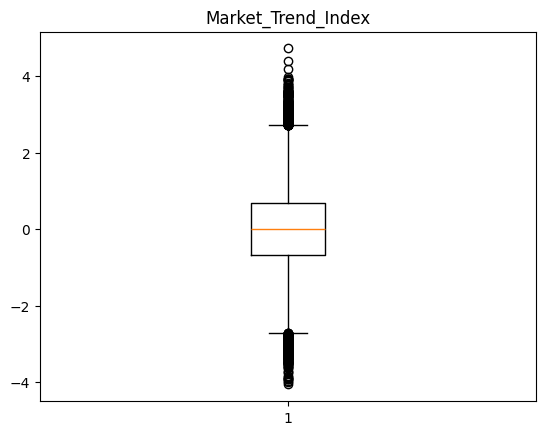

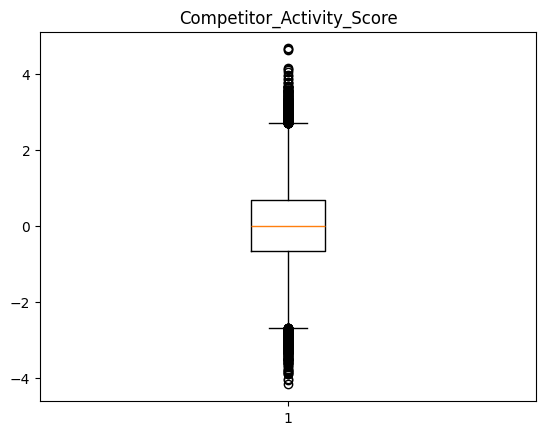

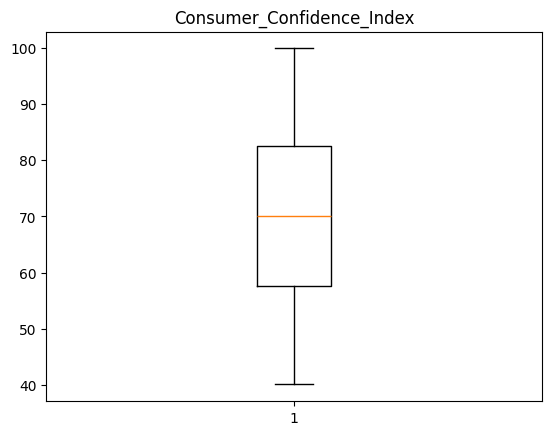

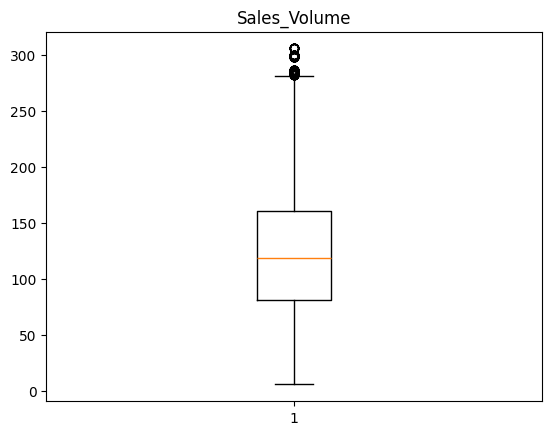

In [12]:
outlier_df_= df.select_dtypes(include=['int','float']).iloc[0:,1:].columns.to_list()
for col in outlier_df_:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()


In [13]:
#Calculate the correlation with target variables
df_= df.select_dtypes(include=np.number).iloc[0:,1:].corr()
correlation=df.select_dtypes(include=np.number).iloc[0:,1:].corr()
print(correlation)

                              Price  Market_Trend_Index  \
Price                      1.000000           -0.001293   
Market_Trend_Index        -0.001293            1.000000   
Competitor_Activity_Score -0.001256           -0.002643   
Consumer_Confidence_Index  0.002414           -0.001214   
Sales_Volume               0.092713           -0.001817   

                           Competitor_Activity_Score  \
Price                                      -0.001256   
Market_Trend_Index                         -0.002643   
Competitor_Activity_Score                   1.000000   
Consumer_Confidence_Index                   0.002260   
Sales_Volume                               -0.001220   

                           Consumer_Confidence_Index  Sales_Volume  
Price                                       0.002414      0.092713  
Market_Trend_Index                         -0.001214     -0.001817  
Competitor_Activity_Score                   0.002260     -0.001220  
Consumer_Confidence_Index       

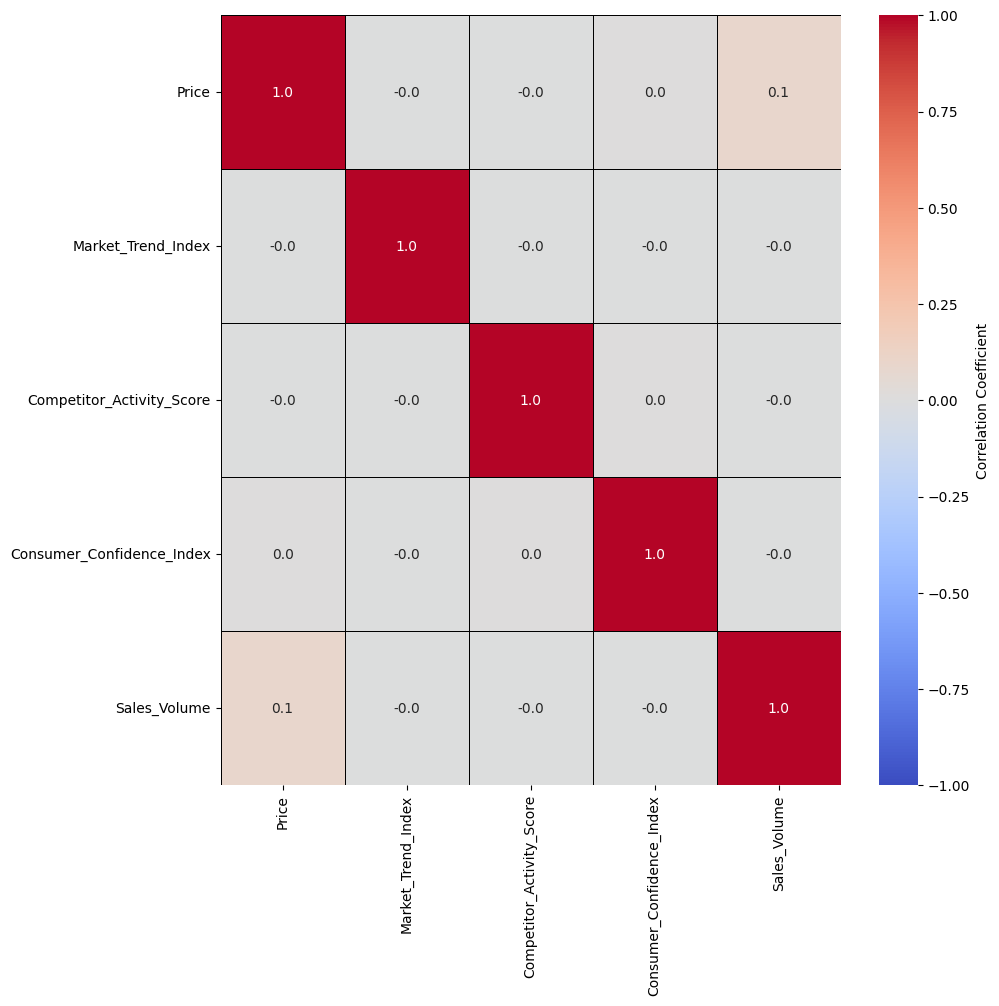

In [14]:

#draw the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    data = correlation,
    annot=True,
    fmt='.1f',
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5,
    linecolor='black',
    cbar_kws={'label': 'Correlation Coefficient'},  
    ax=ax
)
plt.show()

### *Save Cleaned Preproceesed data in EDA*

In [15]:
df.to_csv(r'C:\Users\ASUS PC\Desktop\AMDARI INTERNSHIP\Amdari\ElectroTech-Sales-Forecast\EDA\cleaned_data.csv', index=False)